In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [3]:
df_ames_reg_train = df_ames_train[['Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add','SalePrice']]

In [4]:
df_ames_reg_train.shape

(2051, 8)

In [5]:
df_ames_reg_train.isna().sum()

Neighborhood      0
Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
SalePrice         0
dtype: int64

In [6]:
df_ames_reg_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
df_ames_reg_train.isna().sum()

Neighborhood      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
SalePrice         0
dtype: int64

In [8]:

X = df_ames_reg_train[['Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add']]
y = df_ames_reg_train['SalePrice']
    

In [9]:
X.shape

(2049, 7)

In [10]:
y.shape

(2049,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
X_train.dtypes

Neighborhood       object
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
dtype: object

In [13]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [14]:
pipe3 = make_pipeline(ct1, StandardScaler(with_mean=False), LinearRegression())

In [15]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [16]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood'])],
                                   verbose_feature_names_out=False)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [17]:
preds= pipe3.predict(X_test)

In [18]:
pipe3.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Neighborhood'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(with_mean=False),
 'linearregression': LinearRegression()}

In [19]:
cols_p3 = pipe3.named_steps.get('columntransformer').get_feature_names_out()
cols_p3

array(['Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Gr Liv Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add'], dtype=object)

In [20]:
pipe3.named_steps['linearregression'].coef_

array([-1004.71771001,  -914.82189008, -1702.80443934, -1248.7306089 ,
        2151.54616485,  -466.27933934,  4130.27615461, -5522.66800533,
       -2063.14586601,   594.51741722,  4047.1731921 , -3428.28056901,
        -836.51054944, -2338.0228629 , -2665.02913969, -3488.6164708 ,
       -1523.14109387, -1796.0757341 ,  7571.26225393, 13949.81720598,
       -5423.03639592, -1716.27061959, -3061.77135811, -2643.85983475,
        2904.02699858, 10924.99282985,  3213.05509934,  3010.12735001,
       26040.86823534, 11964.34281441, 12194.46228163,  4143.91939769,
        7999.19603912, 10562.76483043])

In [23]:
df_simpl_reg = pd.DataFrame(zip(cols_p3, 
pipe3.named_steps['linearregression'].coef_))
df_simpl_reg

,0,1
0,Neighborhood_Blmngtn,-1004.717710
1,Neighborhood_Blueste,-914.821890
2,Neighborhood_BrDale,-1702.804439
3,Neighborhood_BrkSide,-1248.730609
4,Neighborhood_ClearCr,2151.546165
5,Neighborhood_CollgCr,-466.279339
6,Neighborhood_Crawfor,4130.276155
7,Neighborhood_Edwards,-5522.668005
8,Neighborhood_Gilbert,-2063.145866
9,Neighborhood_Greens,594.517417


In [24]:
df_simpl_reg.to_csv('./datasets/simplereg.csv', index = False)

In [25]:
residuals = preds - y_test
residuals

1205    12305.936424
953       -87.242734
996     -3352.781089
1604    32513.755853
485     -6670.848646
            ...     
1909      387.472393
90      -6341.293628
1573   -13612.632054
442    -15747.092068
1939   -10436.868073
Name: SalePrice, Length: 513, dtype: float64

In [26]:
#Evaluate my metrics
print('Linear Regression Model #3 w/Categorical Vars, No Full Bath & More: MAE:', mean_absolute_error(y_test, preds))
print('Linear Regression Model #3 w/Categorical Vars, No Full Bath & More: MSE:', mean_squared_error(y_test, preds))
print('Linear Model #3 w/Categorical Vars, No Full Bath & More: R2:', r2_score(y_test, preds))

Linear Regression Model #3 w/Categorical Vars, No Full Bath & More: MAE: 21517.869253063043
Linear Regression Model #3 w/Categorical Vars, No Full Bath & More: MSE: 1002738364.2381965
Linear Model #3 w/Categorical Vars, No Full Bath & More: R2: 0.8328620347352035


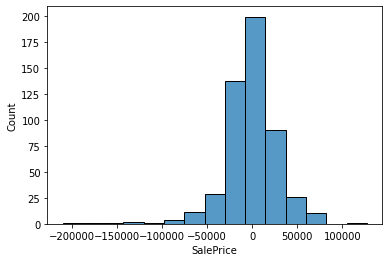

In [27]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

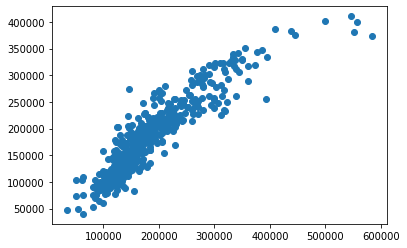

In [28]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

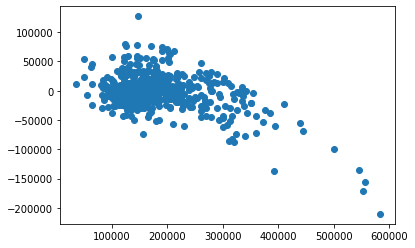

In [29]:
plt.scatter(y_test, residuals);
